In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## SIR

In [89]:
def model(init, params, T, dt):
    beta, gamma = params
    S0, I0, R0 = init
    N = S0 + I0 + R0
    
    S, I, R = [S0], [I0], [R0]
    for t in range(1, int(T / dt)):
        S_to_I = min(S[-1], (beta * S[-1] * I[-1] / N) * dt)
        I_to_R = min(I[-1], (gamma * I[-1]) * dt)
        
        next_S = S[-1] - S_to_I
        next_I = I[-1] + S_to_I - I_to_R
        next_R = R[-1] + I_to_R
        
        S.append(next_S)
        I.append(next_I)
        R.append(next_R)
        
    return np.stack([S, I, R])

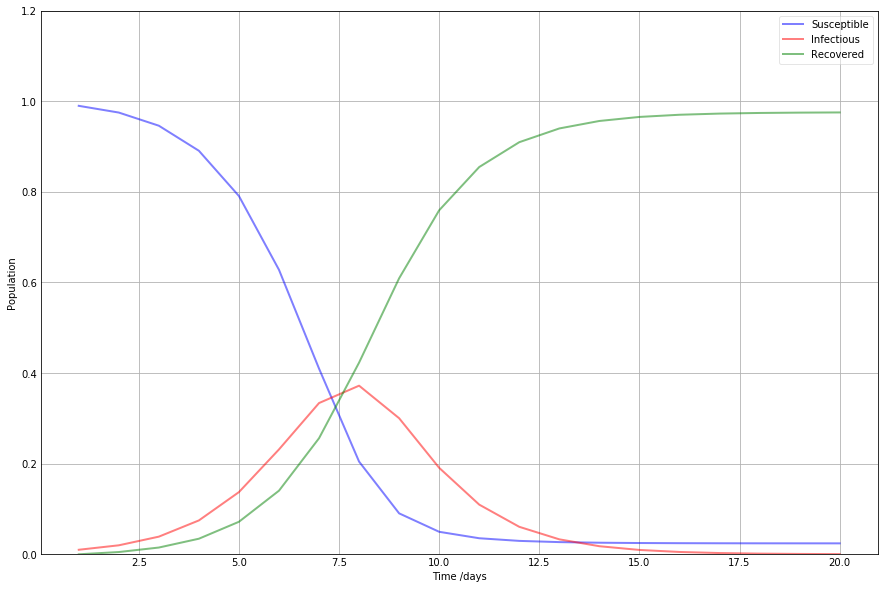

In [90]:
N = 100
beta = 1.5
gamma = 0.5

init = [N-1, 1, 0]
params = beta, gamma
T = 20
dt = 1.

results = model(init, params, T, dt)
S = results[0]
I = results[1]
R = results[2]
cases = (S[1:] - S[0:-1]) / 10.

t = np.linspace(1, T, int(T/dt))
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectious')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

## ABC

In [79]:
def ABC_algorithm(generate_theta, run_model, calc_distance, D, n_particles, n_params, eps):
    results = np.zeros((n_particles, n_params + 1))

    i, j = 0, 0
    while i < n_particles:

        theta_star = generate_theta()
        D_star = run_model(theta_star)
        distance = calc_distance(D, D_star)
        print(distance)

        if distance < eps:
            results[i,:] = theta_star + [distance]
            i += 1
            
            if i % (n_particles/10) == 0:
                print(i)
    
    return results

In [53]:
def generate_theta():
    beta_star = np.random.uniform(0, 3, 1)
    gamma_star = np.random.uniform(0, 1, 1)
    theta_star = [beta_star, gamma_star]
    return theta_star

def run_model(theta):
    N = 100
    init = [N-1, 1, 0]
    T = 20
    dt = 1.
    params = theta # beta, gamma
    results = model(init, params, T, dt)
    S = results[0]
    I = results[1]
    R = results[2]
    return S, I, R

def calc_distance(D, D_star):
    S, I, R = D
    S_star, I_star, R_star = D_star
    mse = ((I - I_star) ** 2).mean()
    return mse

In [55]:
beta, gamma = 1.5, 0.5
theta = beta, gamma
D = run_model(theta)

results = ABC_algorithm(generate_theta, run_model, calc_distance, D, n_particles=1000, n_params=2, eps=10)

100
200
300
400
500
600
700
800
900
1000


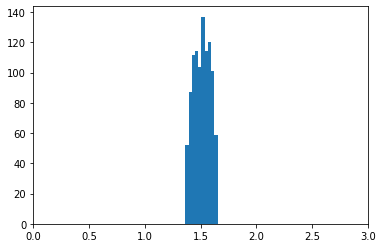

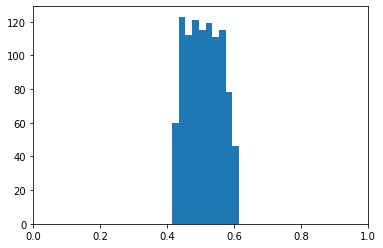

In [56]:
plt.xlim(0, 3)
plt.hist(results[:,0])
plt.show()

plt.xlim(0, 1)
plt.hist(results[:,1])
plt.show()

## Real data

In [126]:
df = pd.read_excel('./data/COVID-19-geographic-disbtribution-worldwide.xlsx')
df = df[df.countriesAndTerritories == 'France'].sort_values('dateRep')
print(df.shape)
df.head(3)

(108, 10)


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
3770,2019-12-31,31,12,2019,0,0,France,FR,FRA,66987244.0
3769,2020-01-01,1,1,2020,0,0,France,FR,FRA,66987244.0
3768,2020-01-02,2,1,2020,0,0,France,FR,FRA,66987244.0


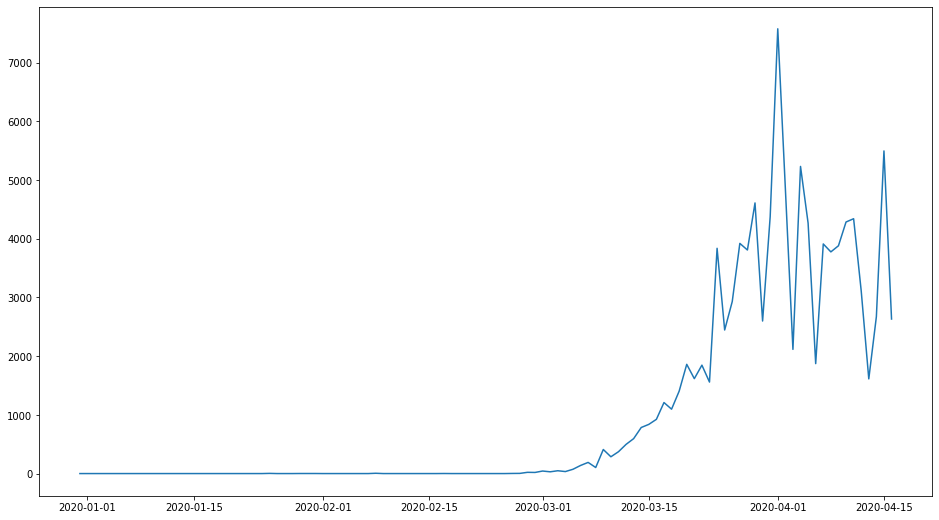

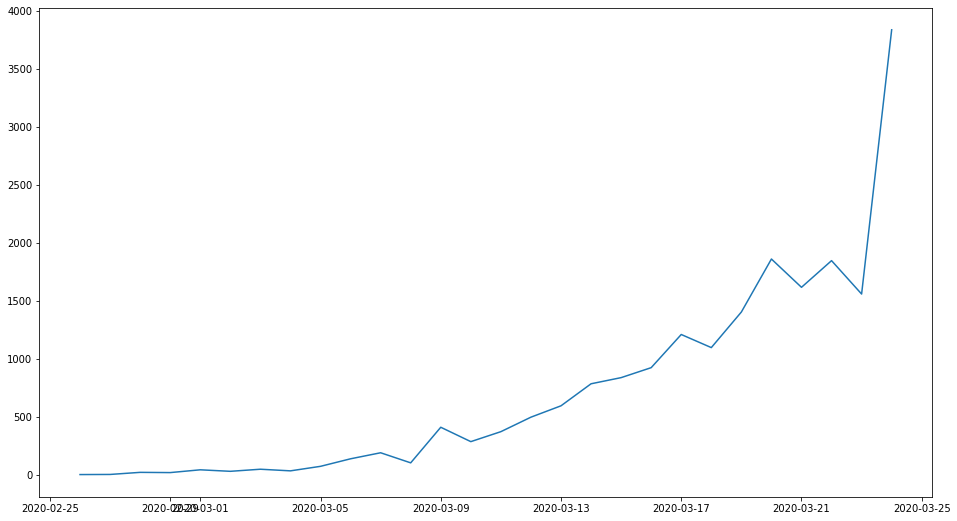

28


In [230]:
plt.figure(figsize=(16,9))
plt.plot(df['dateRep'], df['cases'])
plt.show()

plt.figure(figsize=(16,9))
tmp = df[(df['dateRep'] >= '2020-02-26') & (df['dateRep'] <= '2020-03-24')]
plt.plot(tmp['dateRep'], tmp['cases'])
plt.show()

print(len(tmp))

(28,)


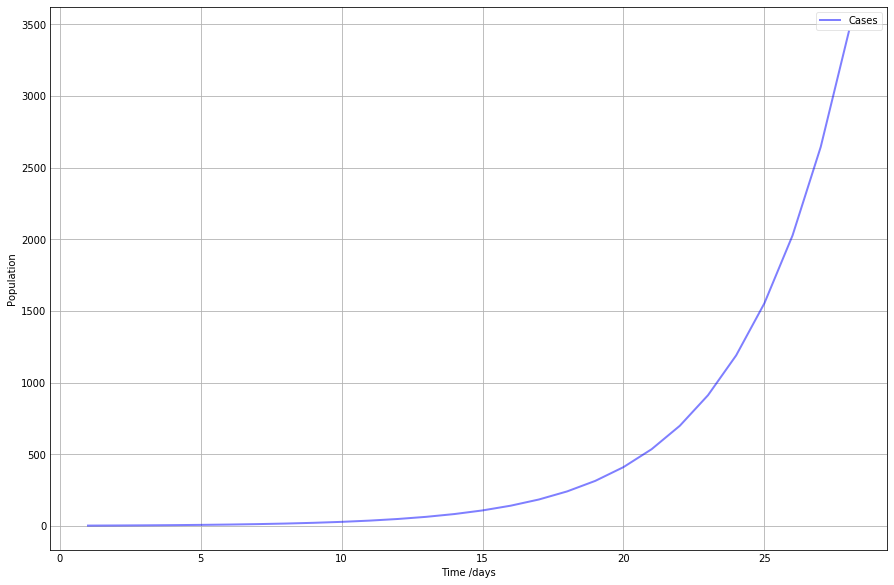

In [267]:
N = 67e6
beta = 1.305
gamma = 5.5

init = [N-2, 2, 0]
params = beta, gamma
T = 29
dt = 1.

results = model(init, params, T, dt)
S = results[0]
cases = S[0:-1] - S[1:]

t = np.linspace(1, T-1, int(T-1/dt))
print(cases.shape)


fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, cases, 'b', alpha=0.5, lw=2, label='Cases')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [262]:
def ABC_algorithm(generate_theta, run_model, calc_distance, D, n_particles, n_params, eps):
    results = np.zeros((n_particles, n_params + 1))

    i, j = 0, 0
    while i < n_particles:

        theta_star = generate_theta()
        D_star = run_model(theta_star)
        distance = calc_distance(D, D_star)
        #print(distance)

        if distance < eps:
            results[i,:] = theta_star + [distance]
            i += 1
            
            if i % (n_particles/10) == 0:
                print(i)
    
    return results

In [263]:
def generate_theta():
    beta_star = np.random.uniform(1.300, 1.310, 1)
    theta_star = [beta_star]
    return theta_star

def run_model(theta):
    N = 67e6
    init = [N-2, 2, 0]
    T = 29
    dt = 1.
    gamma = 6.1
    params = theta + [gamma] # beta, gamma
    results = model(init, params, T, dt)
    S = results[0]
    cases = S[0:-1] - S[1:]
    return cases

def calc_distance(D, D_star):
    cases = D
    cases_star = D_star
    mse = ((cases - cases_star) ** 2).mean()
    return mse

In [264]:
D = tmp['cases']

In [265]:
results = ABC_algorithm(generate_theta, run_model, calc_distance, D, n_particles=1000, n_params=1, eps=146e3)

100
200
300
400
500
600
700
800
900
1000


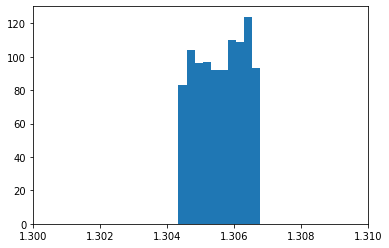

In [266]:
plt.xlim(1.300, 1.310)
plt.hist(results[:,0])
plt.show()